1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


2. Load and View the Data

In [4]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


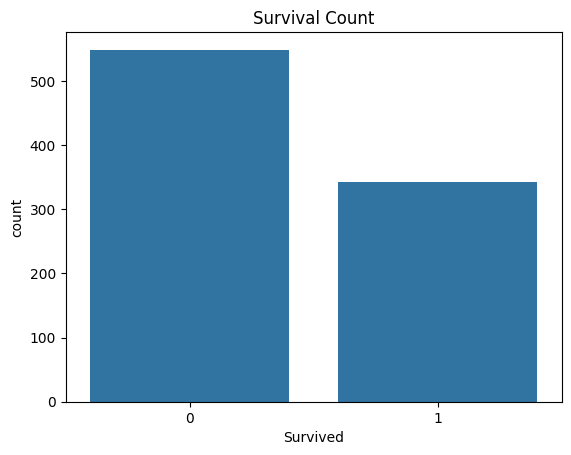

In [5]:
df.info()
df.describe()
df.isnull().sum()

# Survival count plot
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()


4. Data Preprocessing

In [6]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin
df.drop('Cabin', axis=1, inplace=True)

# Encode categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


C:\Users\Sayali Nimbalkar\AppData\Local\Temp\ipykernel_1204\878360682.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Sayali Nimbalkar\AppData\Local\Temp\ipykernel_1204\878360682.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

5. Feature Selection and Train-Test Split

In [19]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 



6. Train and Evaluate Model

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
# Predict on the entire test set
y_pred = model.predict(X_test)

# Count predictions
print("Predicted class counts:", pd.Series(y_pred).value_counts())

# Compare with actual
print("\nActual class counts:", y_test.value_counts())


Predicted class counts: 0    115
1     64
Name: count, dtype: int64

Actual class counts: Survived
0    110
1     69
Name: count, dtype: int64


In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8156424581005587


7. Save Model or Predictions

In [9]:
import joblib
joblib.dump(model, 'titanic_model.pkl')  # Save the model for future use


['titanic_model.pkl']

8. Visualize the Results

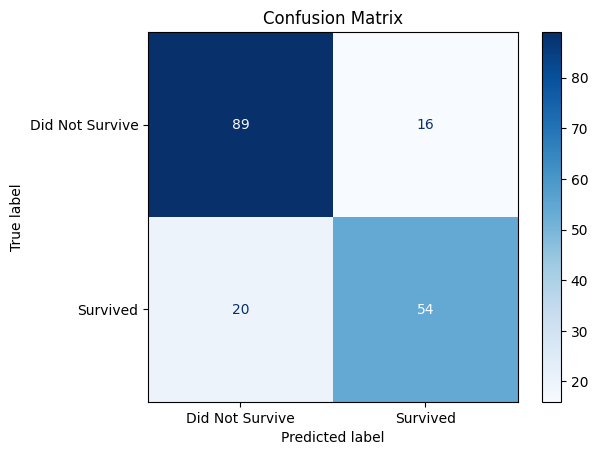

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did Not Survive", "Survived"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


9. Manually Test with New Input

In [12]:
# Example: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
new_passenger = np.array([[2, 1, 28, 0, 0, 50, 0]])  
prediction = model.predict(new_passenger)

if prediction[0] == 1:
    print("Prediction: Survived!")
else:
    print("Prediction: Did not survive!")


Prediction: Survived!


C:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


10. Taking the input from User

In [28]:
# Input from user
print("Enter passenger details to predict survival:")
pclass = int(input("Ticket class (1, 2, 3): "))
sex = input("Sex (male/female): ")
age = float(input("Age: "))
sibsp = int(input("No. of siblings/spouses aboard: "))
parch = int(input("No. of parents/children aboard: "))
fare = float(input("Fare paid: "))
embarked = input("Port of Embarkation (S, C, Q): ")

# Convert categorical inputs
sex = 0 if sex.lower() == 'male' else 1
embarked = {'s': 0, 'c': 1, 'q': 2}.get(embarked.lower(), 0)

# Create input array
new_passenger = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])

# Predict survival
prediction = model.predict(new_passenger)

# Show result
if prediction[0] == 1:
    print("The passenger would have SURVIVED.")
else:
    print("The passenger would NOT have survived.")


Enter passenger details to predict survival:


Ticket class (1, 2, 3):  3
Sex (male/female):  0
Age:  30
No. of siblings/spouses aboard:  0
No. of parents/children aboard:  0
Fare paid:  7.25
Port of Embarkation (S, C, Q):  0


The passenger would NOT have survived.


C:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
